In [1]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import random

import numpy as np

import matplotlib.cm as cm

import pickle

from utils import functions

# parameters setup 
from global_vars import global_vars

%matplotlib notebook

In [2]:
# restoring variables from memory (GT images, indices)
%store -r

In [3]:
# opening GT images and noised images
with open('pickled_data/EVAL/un_noised_images_eval_beam_zoom.pkl', 'rb') as un_noised_images_eval_beam_zoom_pickled:
    un_noised_images = pickle.load(un_noised_images_eval_beam_zoom_pickled)
with open('pickled_data/EVAL/noised_images_eval_beam_zoom.pkl', 'rb') as noised_images_eval_beam_zoom_pickled:
    noised_images = pickle.load(noised_images_eval_beam_zoom_pickled)

In [26]:
# to be deleted
# 2nd 2D plot:

# -> noise, purple one 
print('noise, purple one: ', values[1,19])
# -> noise, red one 
print('noise, red one: ', values[18,19])

print('')

# -> CARE, purple one 
print('CARE, purple one: ', values_CARE[1,19])
# -> CARE, red one 
print('CARE, red one: ', values_CARE[18,19])

noise, purple one:  tensor(0.1412)
noise, red one:  tensor(0.0402)

CARE, purple one:  tensor(0.0429)
CARE, red one:  tensor(0.0112)


In [4]:
# -NRMSE-
# 4a. Computing NRMSE for each GT-NOISE image pair in the data collection
# dims=[m, n, reps]
metric_output = functions.NRMSE_compute(un_noised_images, noised_images)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_NRMSE_beam_zoom = functions.set_mean_std_compute(metric_output)

In [5]:
# -RMSE-
# 4b. Computing RMSE for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.RMSE_compute(un_noised_images, noised_images)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_RMSE_beam_zoom = functions.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


In [6]:
# -PSNR-
# 4c. Computing PSNR for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.PSNR_compute(un_noised_images, noised_images)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_PSNR_beam_zoom = functions.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


In [7]:
# -SSIM-
# 4c. Computing SSIM for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.SSIM_compute(un_noised_images, noised_images)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_SSIM_beam_zoom = functions.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


In [9]:
# -MS_SSIM-
# 4c. Computing MS_SSIM for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.MS_SSIM_compute(un_noised_images, noised_images)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_MS_SSIM_beam_zoom = functions.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


In [15]:
%store metric_stats_NRMSE_beam_zoom
%store metric_stats_RMSE_beam_zoom
%store metric_stats_PSNR_beam_zoom
%store metric_stats_SSIM_beam_zoom
%store metric_stats_MS_SSIM_beam_zoom

Stored 'metric_stats_NRMSE_beam_zoom' (Tensor)
Stored 'metric_stats_RMSE_beam_zoom' (Tensor)
Stored 'metric_stats_PSNR_beam_zoom' (Tensor)
Stored 'metric_stats_SSIM_beam_zoom' (Tensor)
Stored 'metric_stats_MS_SSIM_beam_zoom' (Tensor)


<IPython.core.display.Javascript object>


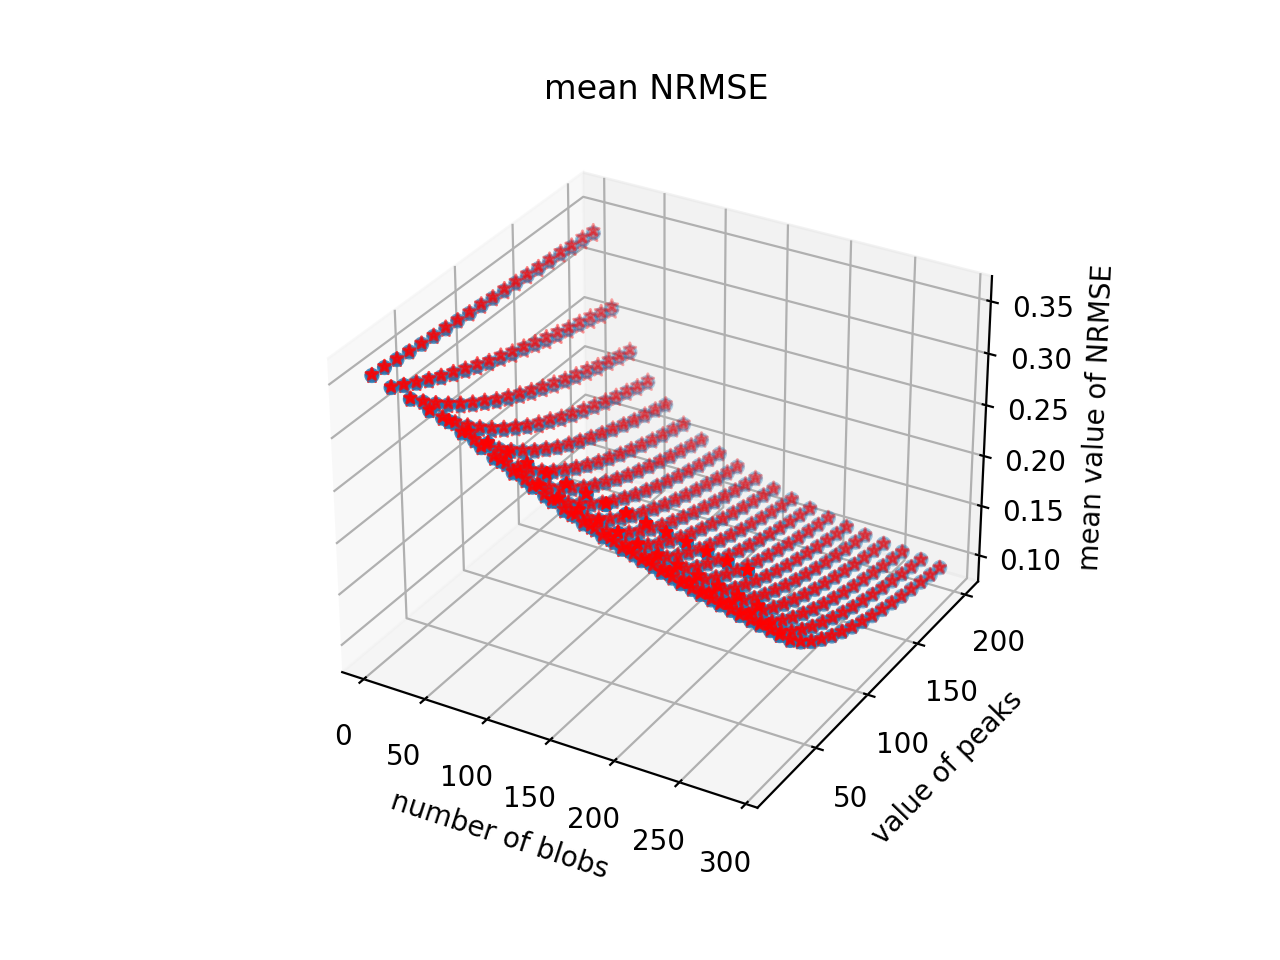

<IPython.core.display.Javascript object>


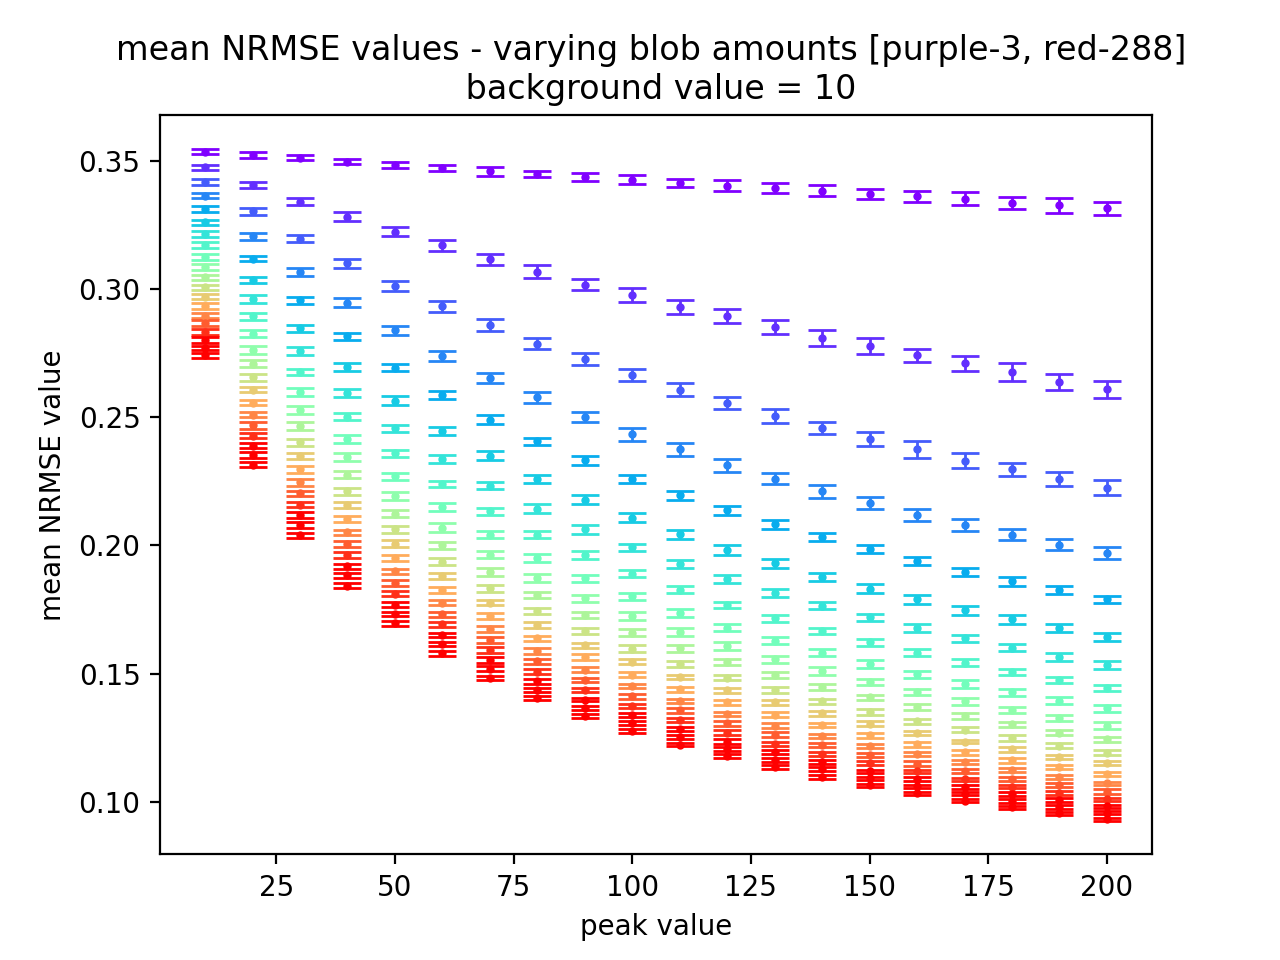

<IPython.core.display.Javascript object>


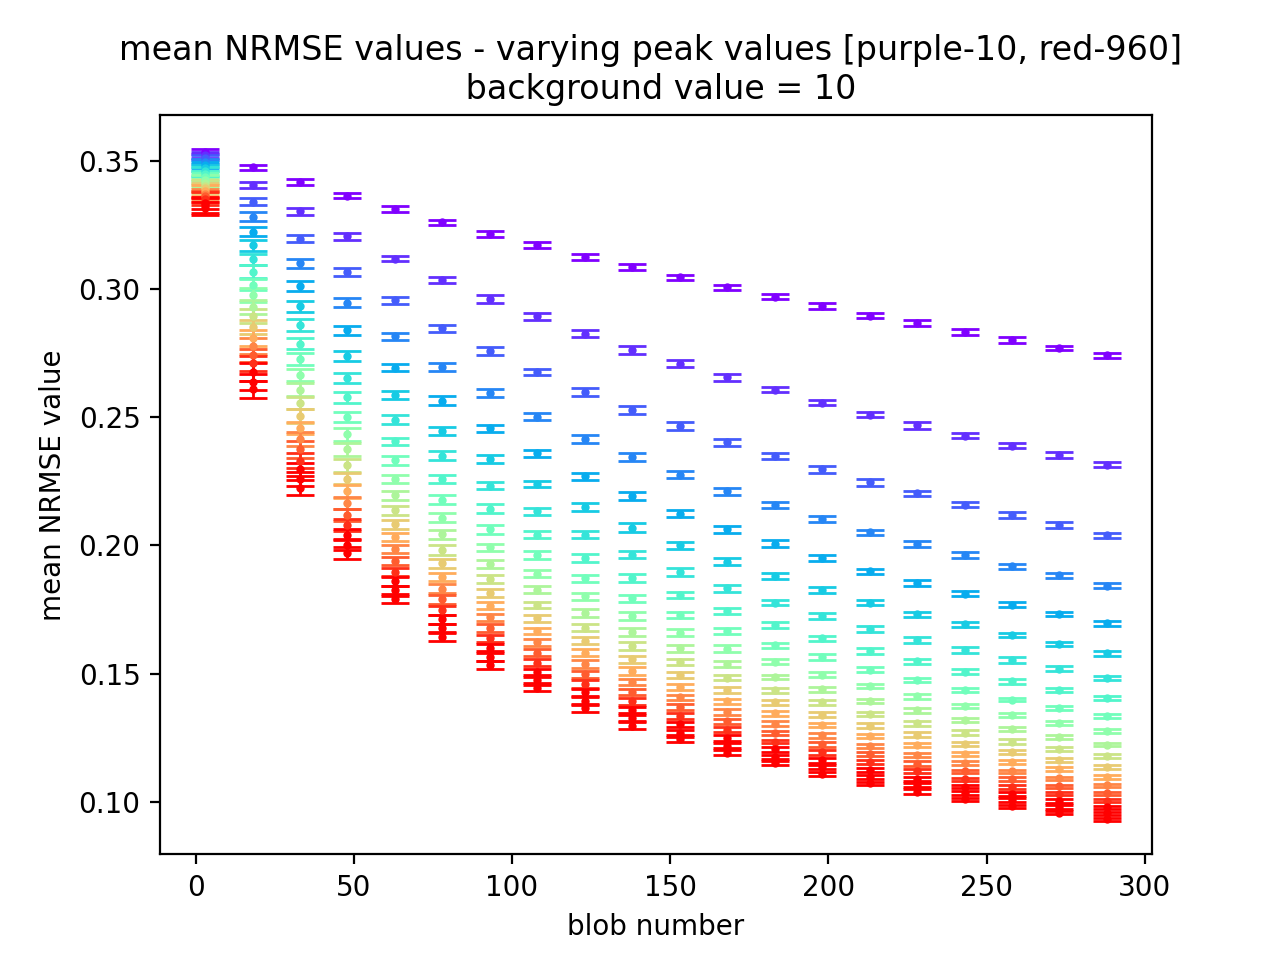

In [10]:
# -NRMSE-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_NRMSE_beam_zoom, indices_eval_zoom, 'NRMSE')

<IPython.core.display.Javascript object>


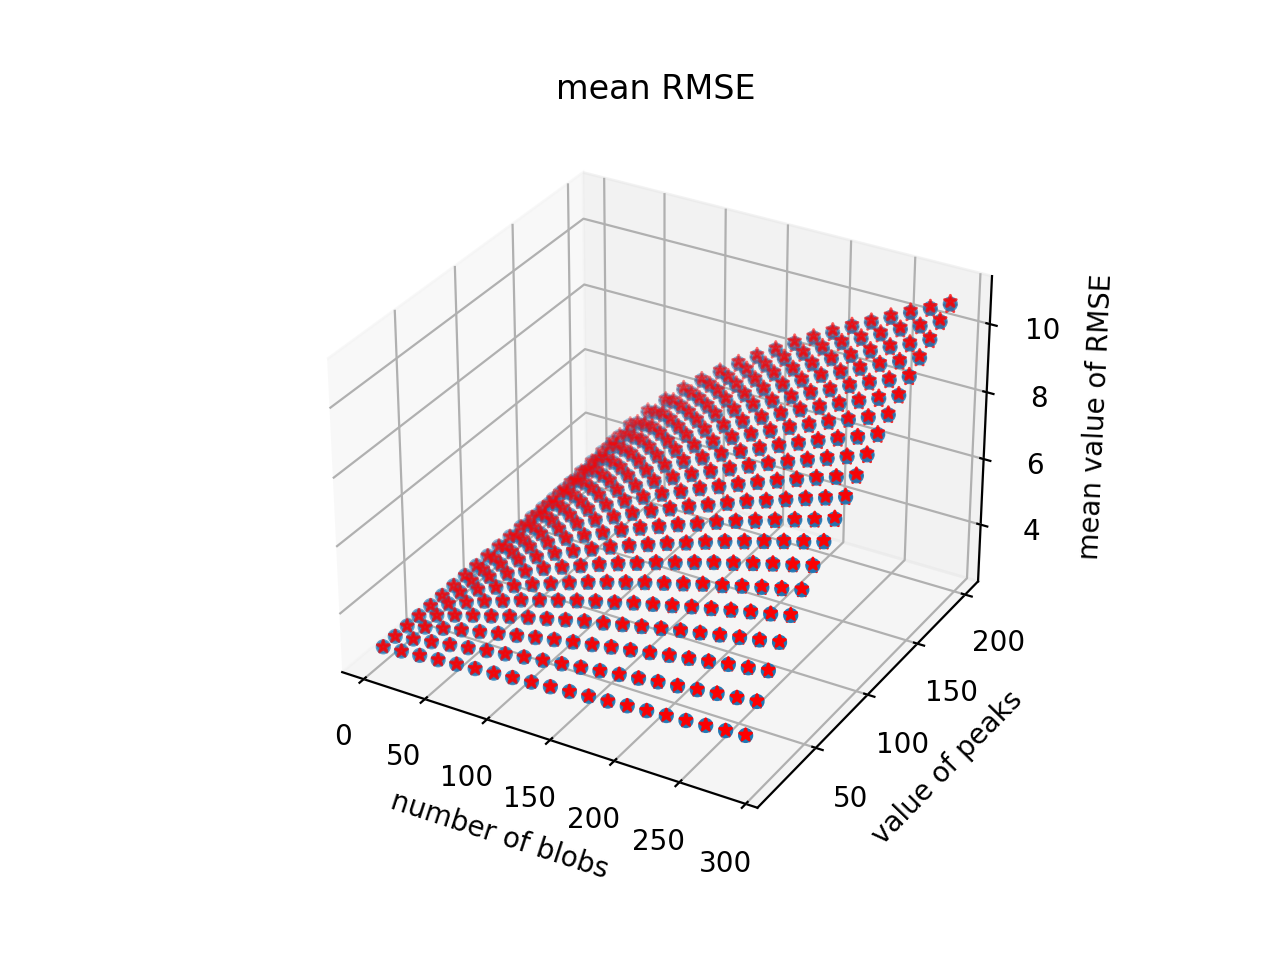

<IPython.core.display.Javascript object>


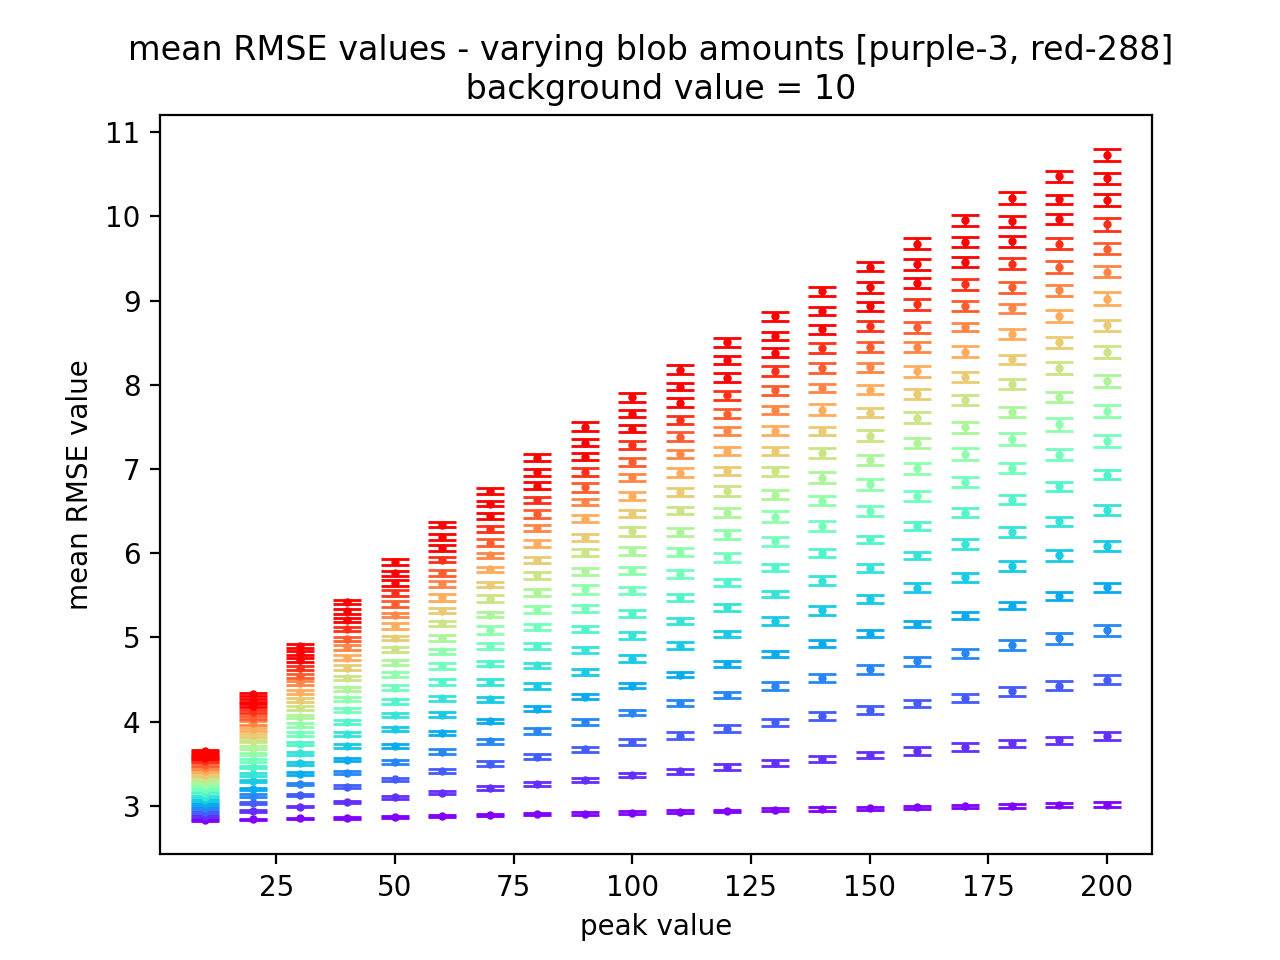

<IPython.core.display.Javascript object>


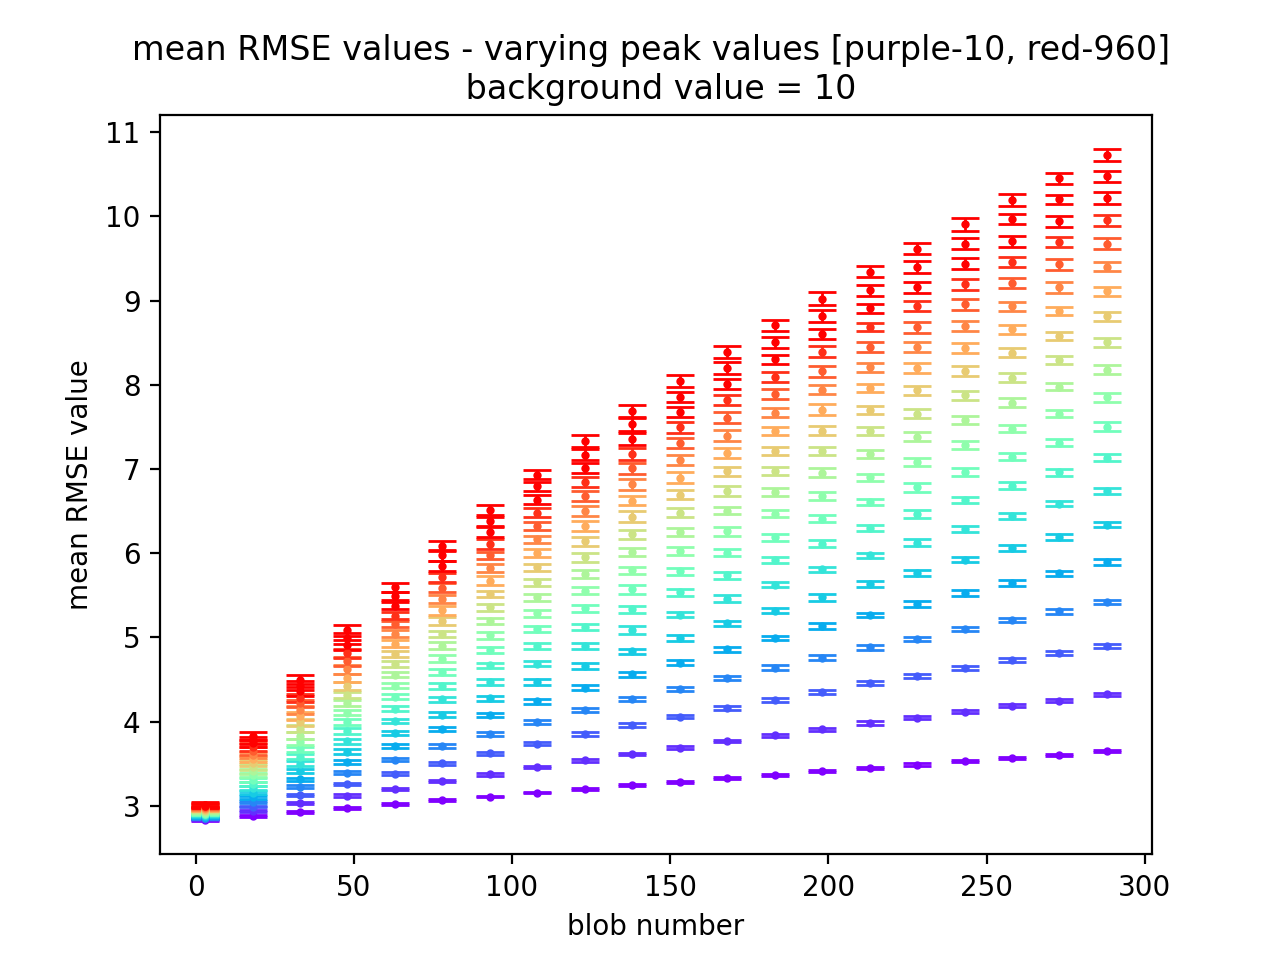

In [11]:
# -RMSE-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_RMSE_beam_zoom, indices_eval_zoom, 'RMSE')

<IPython.core.display.Javascript object>


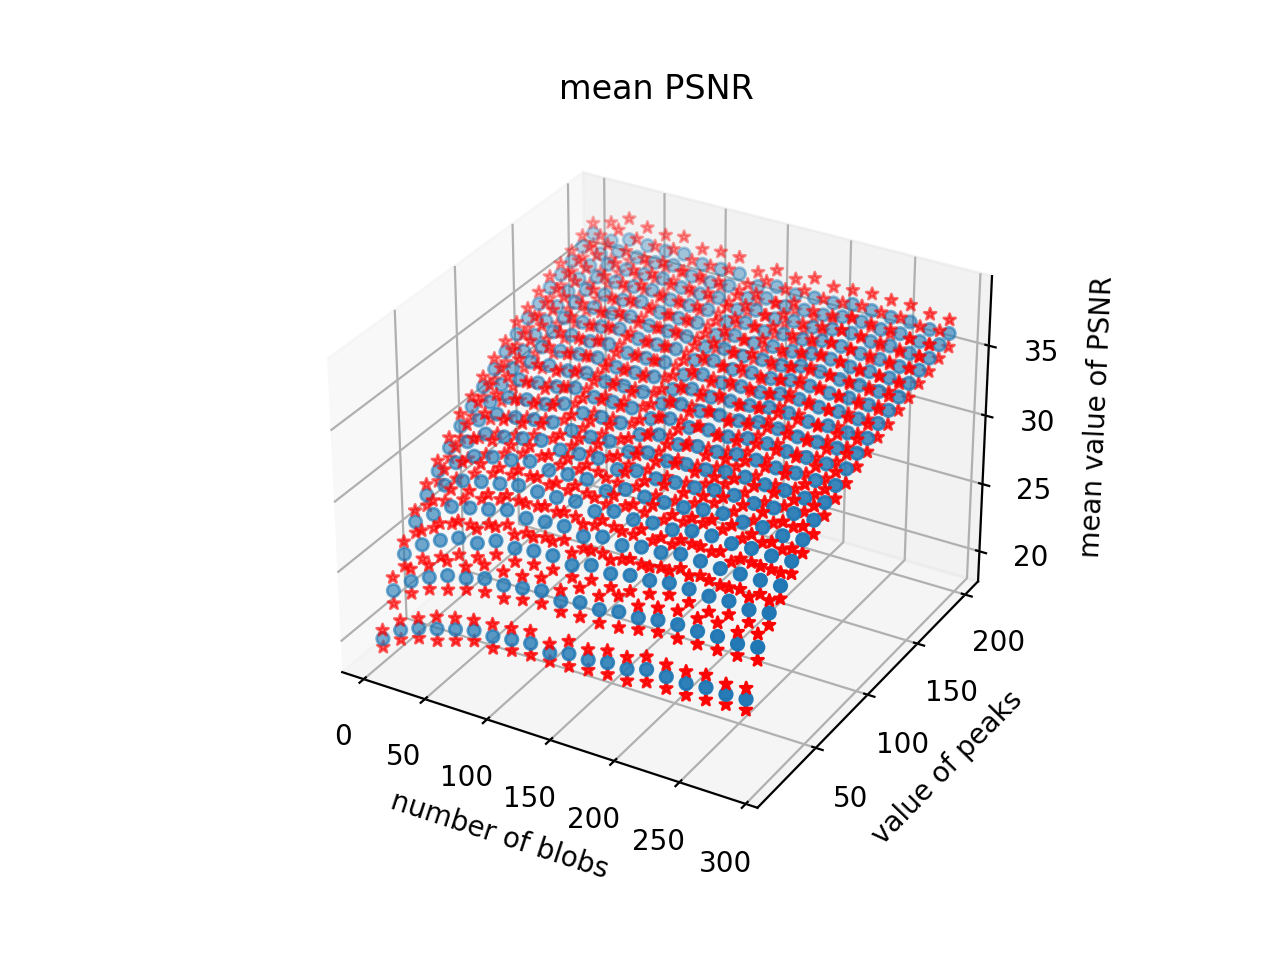

<IPython.core.display.Javascript object>


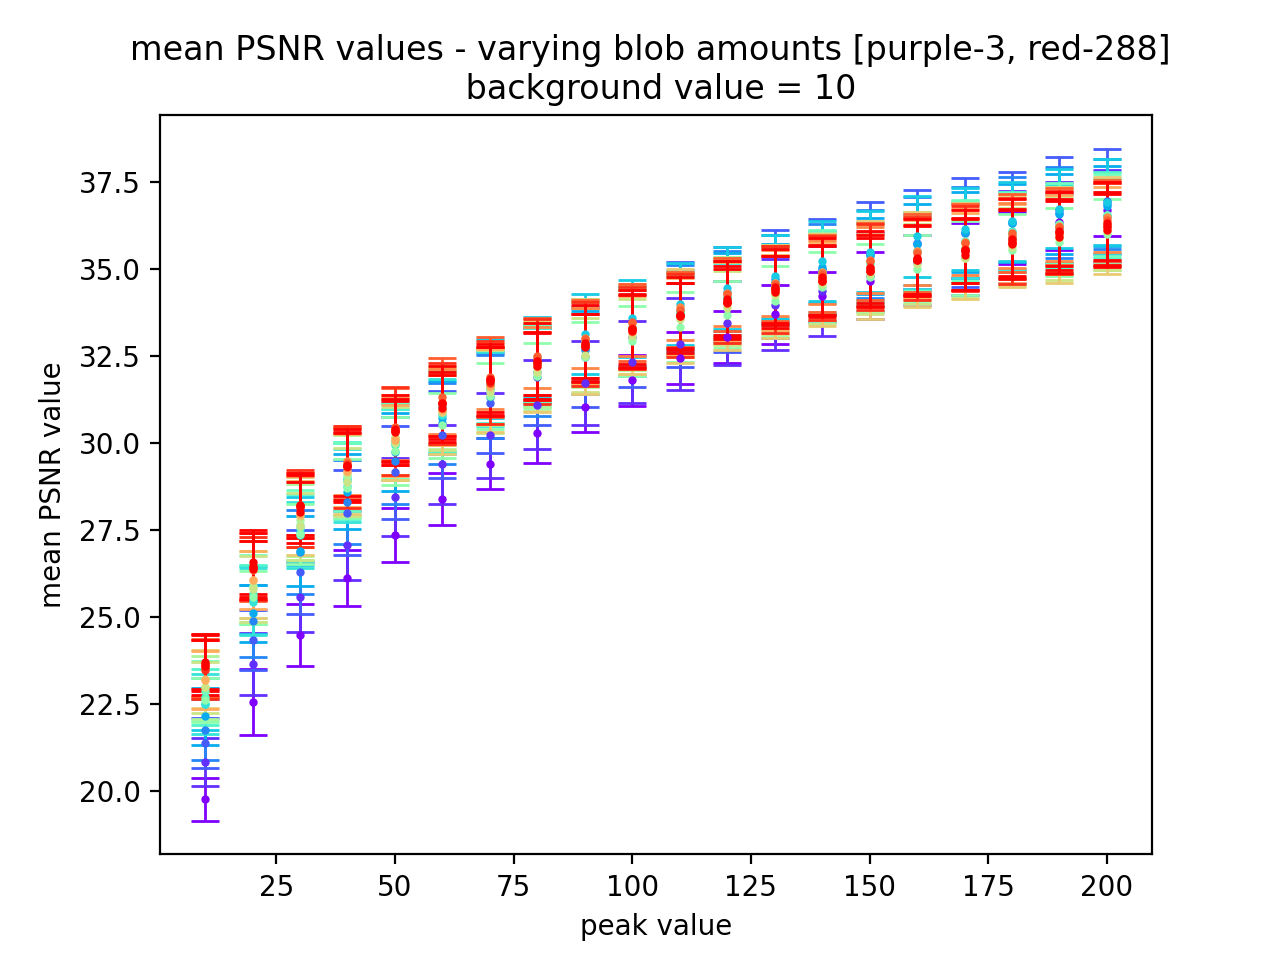

<IPython.core.display.Javascript object>


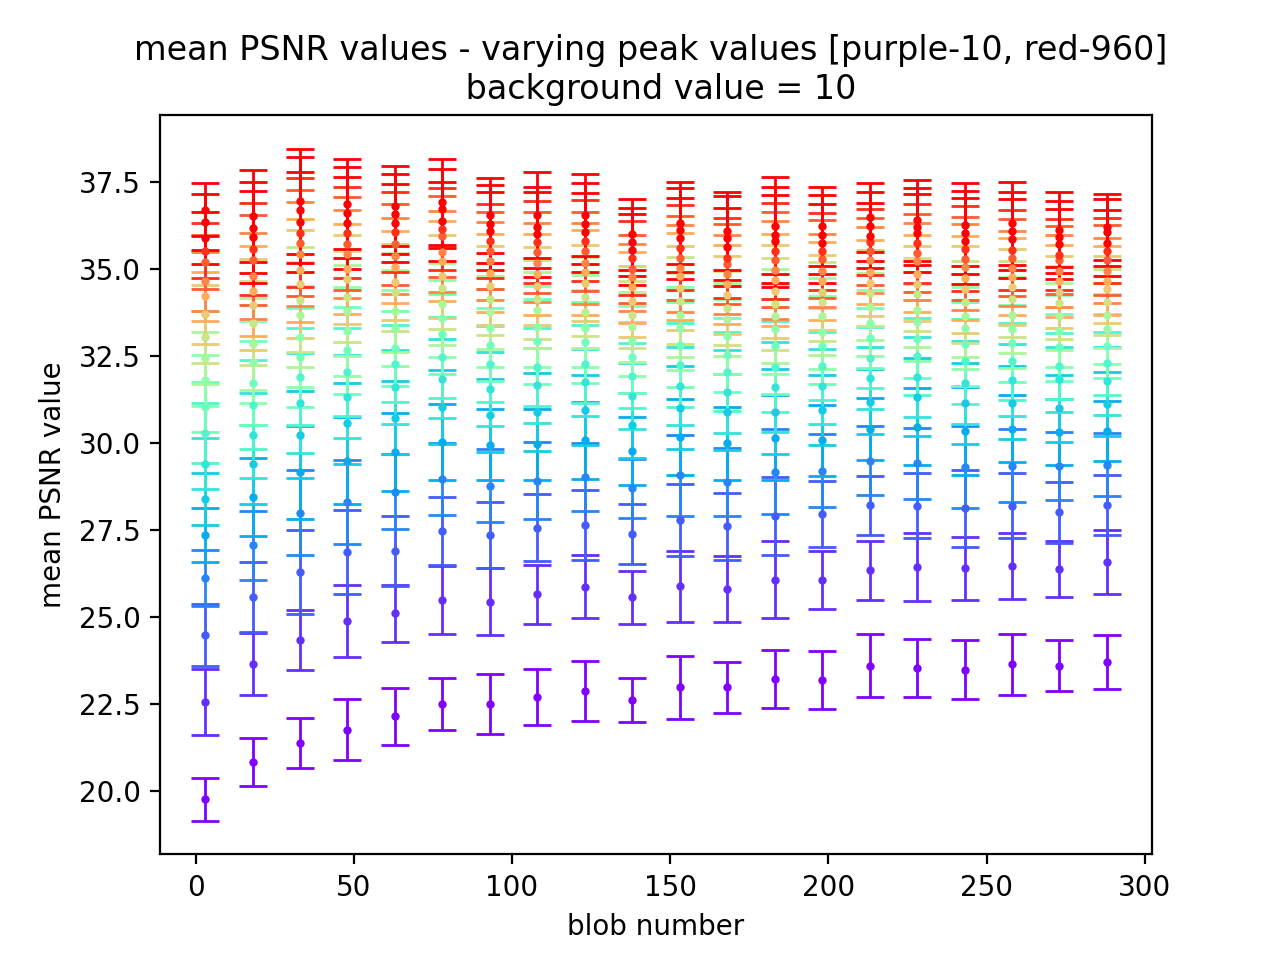

In [12]:
# -PSNR-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_PSNR_beam_zoom, indices_eval_zoom, 'PSNR')

<IPython.core.display.Javascript object>


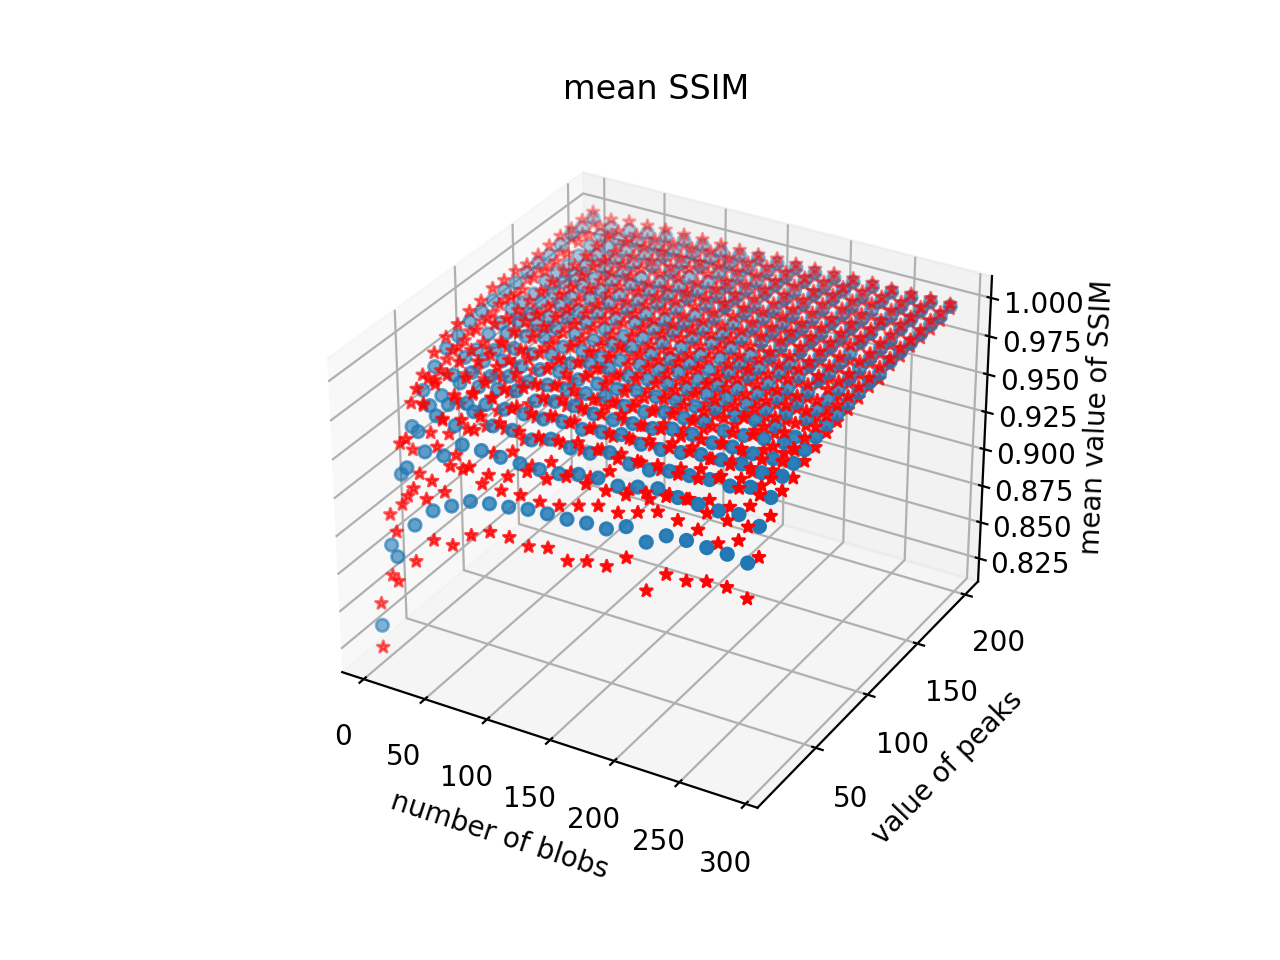

<IPython.core.display.Javascript object>


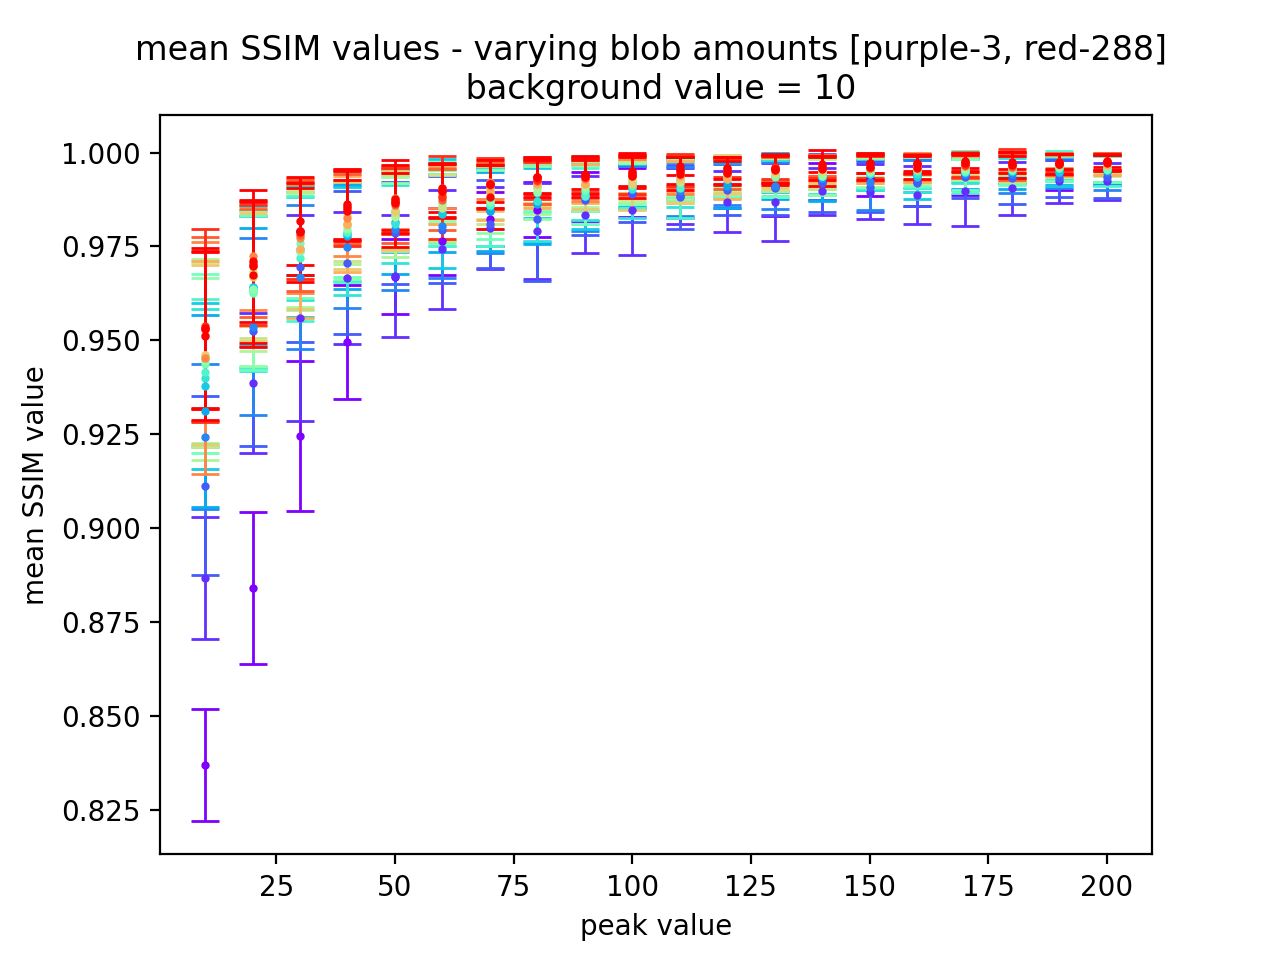

<IPython.core.display.Javascript object>


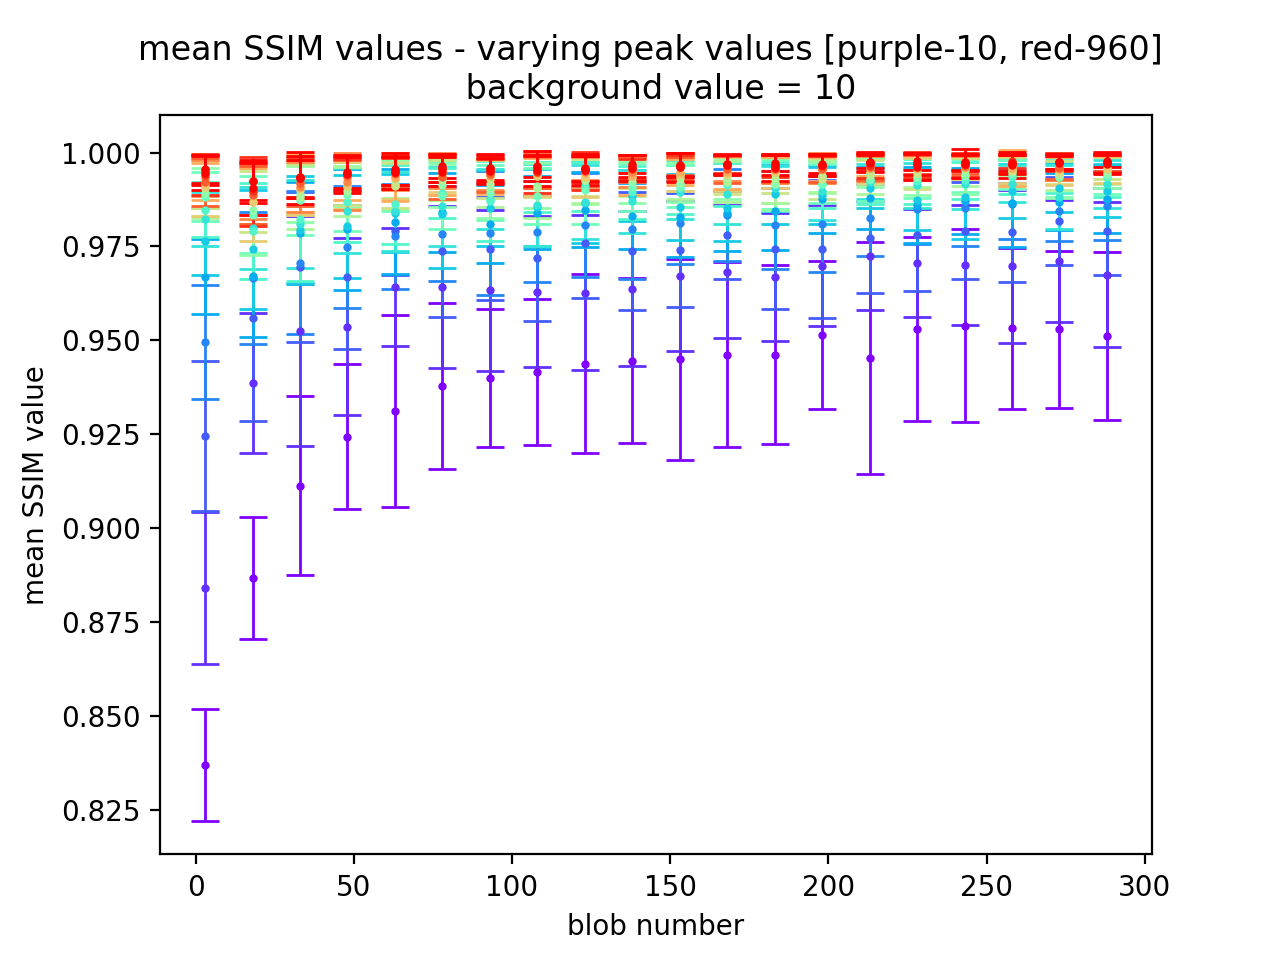

In [13]:
# -SSIM-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_SSIM_beam_zoom, indices_eval_zoom, 'SSIM')

<IPython.core.display.Javascript object>


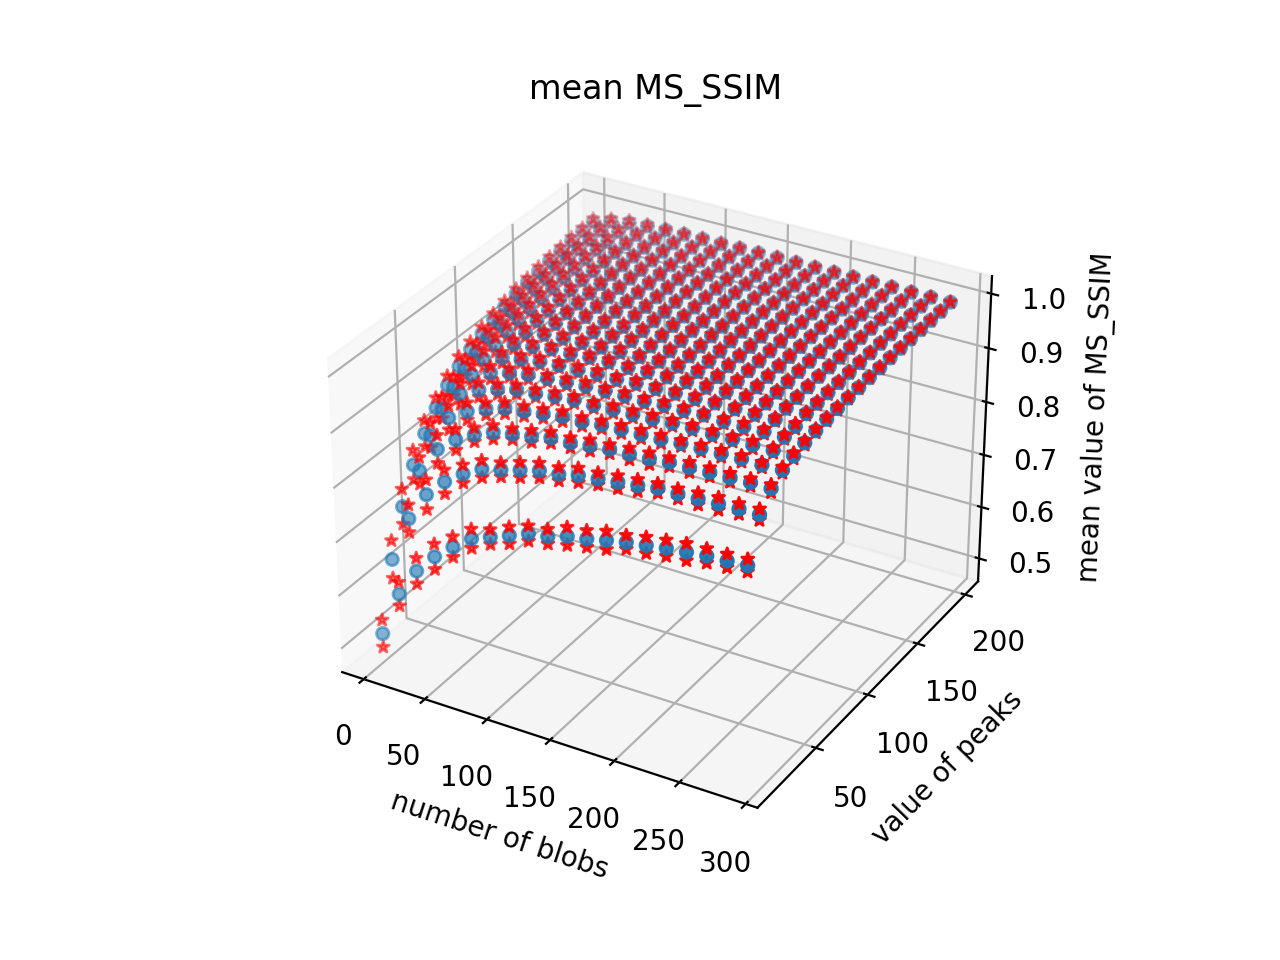

<IPython.core.display.Javascript object>


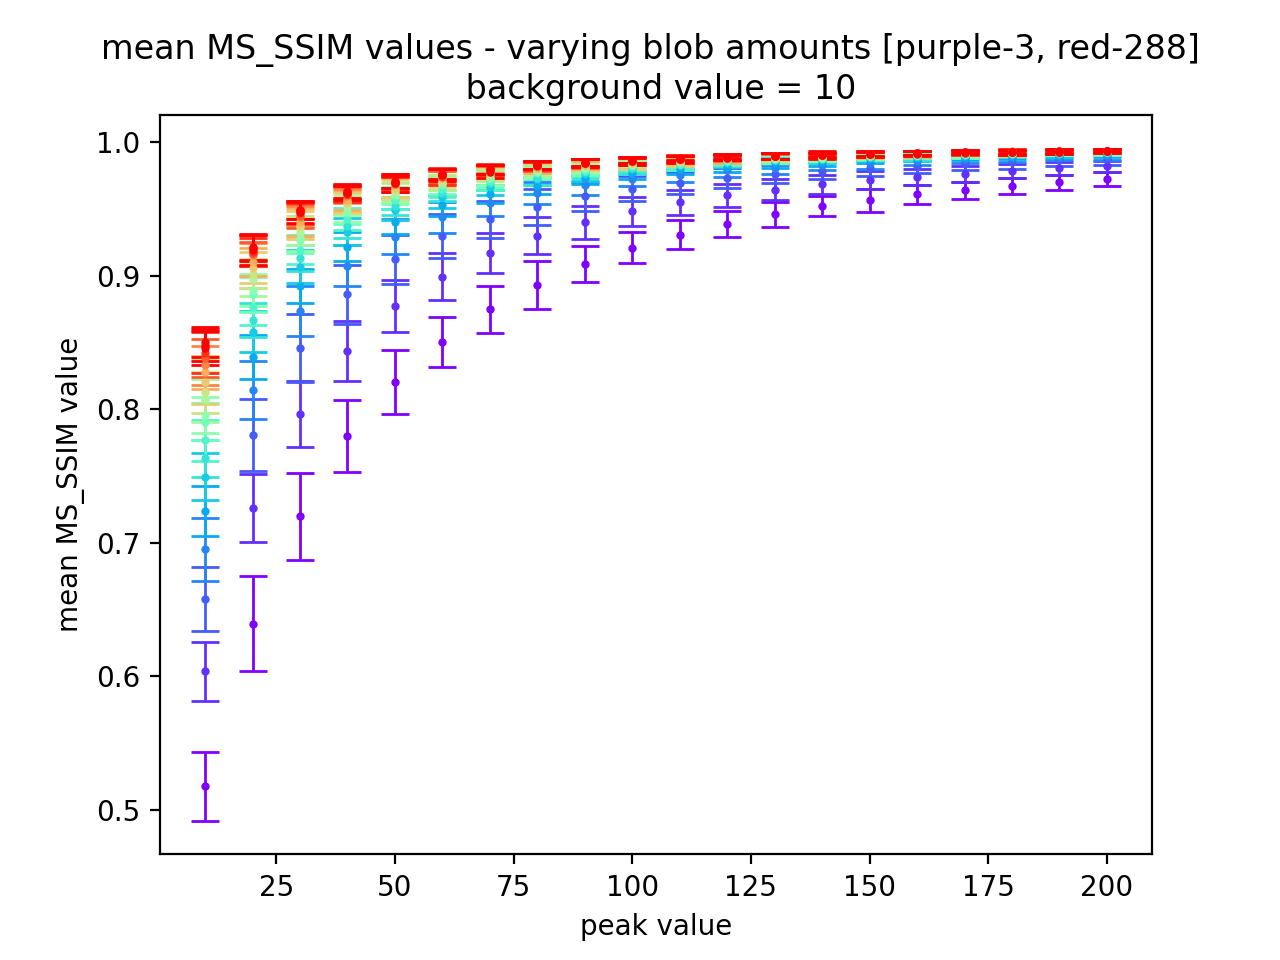

<IPython.core.display.Javascript object>


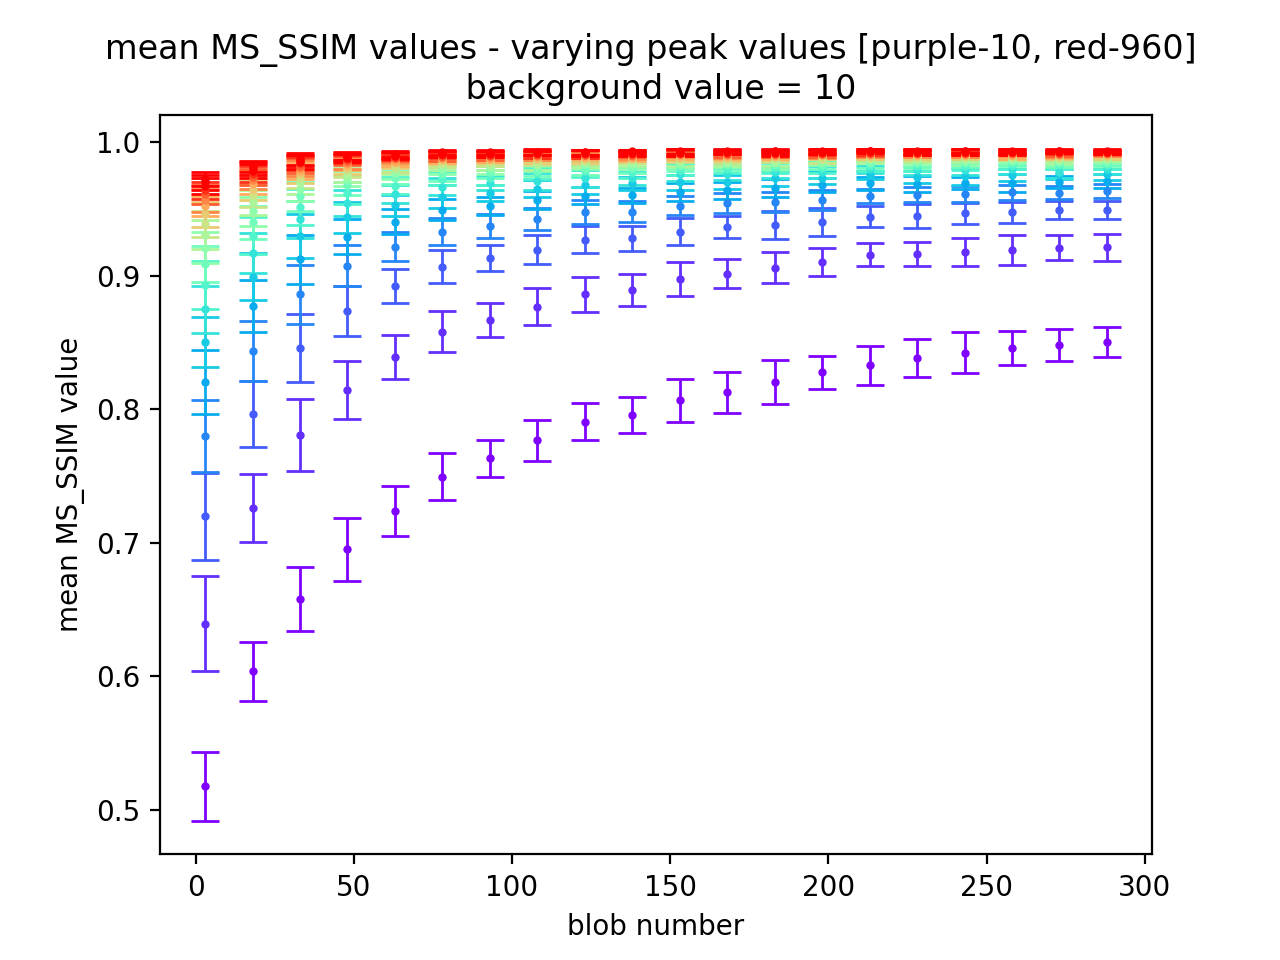

In [14]:
# -MS_SSIM-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_MS_SSIM_beam_zoom, indices_eval_zoom, 'MS_SSIM')